# COVID - 19 Project #

The goal os the project is to understand this dataset, gain some insight from it. Finally to utilize sklearn to train some models of covid and make predictions.

the data set is from https://health-infobase.canada.ca/covid-19/ which consists of data related to COVID-19. There are several variables such as number of cases per day, deaths per day, provincial rates and many others. 

# 1) Setup #

Setup we will be importing linbraries, files, preliminary data analysis to get a better understanding of the data we will be working with. 

In [1]:
# import all the libraries, Pandas (data processing)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

#import linear model for linearregression and polynomial
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score

#### Import data ####

Download .csv file from https://health-infobase.canada.ca/covid-19/ to follow along.

In [2]:
# open data folder from .cvs file. files are obtained from https://health-infobase.canada.ca/covid-19/
path = 'Covid_19_cleaned_data.csv'

#place data into a DataFrame
df = pd.read_csv(path, index_col='ProvinceNameEN')

df[['Date']] = df[['Date']].astype("datetime64")
df.dtypes

ProvinceID                 int64
Date              datetime64[ns]
ConfirmedCases             int64
ProbableCases              int64
Deceased                   int64
Total                      int64
TotalToday                 int64
dtype: object

#### Data Description #### 

Show data header

In [3]:
df.head()

,ProvinceID,Date,ConfirmedCases,ProbableCases,Deceased,Total,TotalToday
ProvinceNameEN,,,,,,,
Ontario,35,2020-01-31,3,0,0,3,3
British Columbia,59,2020-01-31,1,0,0,1,1
Canada,1,2020-01-31,4,0,0,4,4
Ontario,35,2020-02-08,3,0,0,3,0
British Columbia,59,2020-02-08,4,0,0,4,3


#### ploting functions ####

In [17]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 6
    height = 5
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Days')
    plt.ylabel('Proportion of Cases')

    plt.show()
    plt.close()

In [18]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 6
    height = 5
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.max(), xtest.max()])

    xmin=min([xtrain.min(), xtest.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

#### Provincial data ####

splinting the data into province wide dataframes. Canada also has its own dataframe. 

In [19]:

BC = df.loc['British Columbia']
AB = df.loc['Alberta']
SK = df.loc['Saskatchewan']
MB = df.loc['Manitoba']
ON = df.loc['Ontario']
QC = df.loc['Quebec']
NL = df.loc['Newfoundland and Labrador']
NB = df.loc['New Brunswick']
NS = df.loc['Nova Scotia']
PE = df.loc['Prince Edward Island']
YT = df.loc['Yukon']
NT = df.loc['Northwest Territories']
NU = df.loc['Nunavut']
CN = df.loc['Canada']

# 4a) Linear Regression #
<h3> Linear Regression and Multiple Linear Regression</h3>

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The independent variable (number of days) (X)</li>
    <li>The dependent variable (that we want to predict, Number of covid cases) (Y)</li>
</ul>

$$
 Y: Dependent \ Variable \ (Covid cases)\\
 X: Independent \ Variables \ (Days)
$$

 <b>Resulting linear fuction will be:</b>
$$
Yhat = a + b  X
$$

</b> where Yhat is the predicted fit </b>

Preforming linear regression, this data is not linear, however, for a sanity check it is important to prove it is not. 

In [20]:
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Linear Fit ####

determine linear fit, using date as the independant variable and Confirmed cases as the Dependant variable.

In [21]:
Y = CN.ConfirmedCases
Y = Y.values.reshape(-1, 1)
X = CN_1.dt.dayofyear
X_1 = CN_1.dt.dayofyear
X = X.values.reshape(-1, 1)
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#pridict the model
Yhat=lm.predict(X)

#intercept
b = lm.intercept_

#slope
m = lm.coef_

print('Equation : ','y =',b,'+',m,'*x')

Equation :  y = [-30260.04785356] + [[476.9304543]] *x


#### Linear Plot ####

It is obvious that the data is not linear. This proves sanity check.

Plot the linear fit with the actual data. This will give a good understanding if a linear model will work for this data

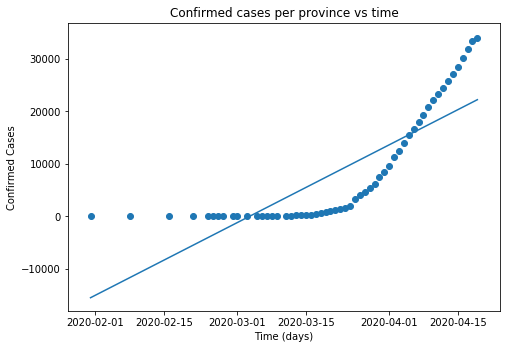

R^2:  0.6851550851201311


In [23]:
#develop logrithmic plot
fig4=plt.figure()
ax4=fig4.add_axes([0,0,1,1])
ax4.plot(CN['Date'],Yhat)
ax4.scatter(CN['Date'],CN['ConfirmedCases'])
ax4.set_xlabel('Time (days)')
ax4.set_ylabel('Confirmed Cases')
ax4.set_title('Confirmed cases per province vs time')
plt.show()
print("R^2: ",lm.score(X,CN['ConfirmedCases']))

# Residual plot ####

This is a residual plot. This set the fit to a mean of zero. For a good residual we want the values to be around the mean of zero. This is not true therefore we can say for certain that the linear fit is not a good model for the covid data.

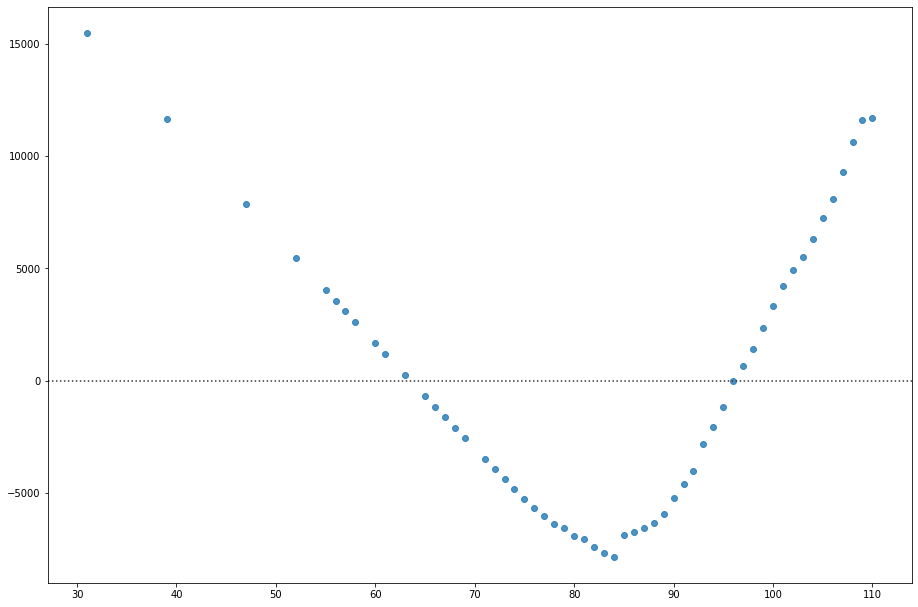

In [24]:
fig5=plt.figure()
ax5=fig5.add_axes([0,0,2,2])
sns.residplot(X,Y)

#### Distribution Plot ####

I think for linear models, doing a distribution plot is not very important because the residual plot is better suited for this. However, I am not 100% sure what is the most prefered practice, so I will leave this in for now. 

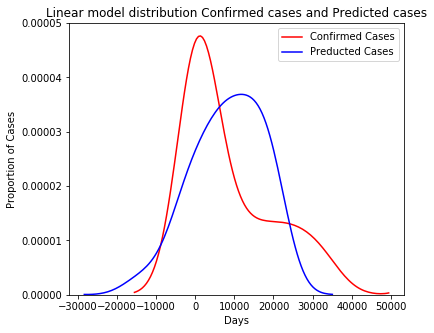

In [25]:

DistributionPlot(CN['ConfirmedCases'], Yhat, 'Confirmed Cases', 'Preducted Cases', 'Linear model distribution Confirmed cases and Predicted cases')

# 5a) Train Test Split #

Training and testing will be split for the linear regression model. 

An important step in testing our model is to split the data into training and testing data. We will be using X as days, and Y as confirmed cases.

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 9
number of training samples: 47


#### Linear regression ####

will be developing a Linear regression model for the train and test data. 

In [28]:
lre = LinearRegression()
lre.fit(x_train,y_train)
print('R^2 for test data',lre.score(x_test,y_test))
print('R^2 for train data',lre.score(x_train,y_train))

R^2 for test data 0.642280185181845
R^2 for train data 0.6864021248951315


#### Cross validation score ####

I am nit sure if i have suffivent testing data. so i will preform a cross-validation. We will be folding the data 4 times in this case.

In [29]:
Rcross = cross_val_score(lre,X,Y,cv=4)
print(Rcross)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())


[-1.42797021e+06 -2.61446541e+02 -1.84396796e+00 -9.08483170e+00]
The mean of the folds are -357060.6454653779 and the standard deviation is 618289.9321900149


Negative R^2 means the model is overfitting the data.

# 4b) Polynomial Regression #

This section will be about the polynomial model. We will be using the polyfit from numpy to do this fitting.

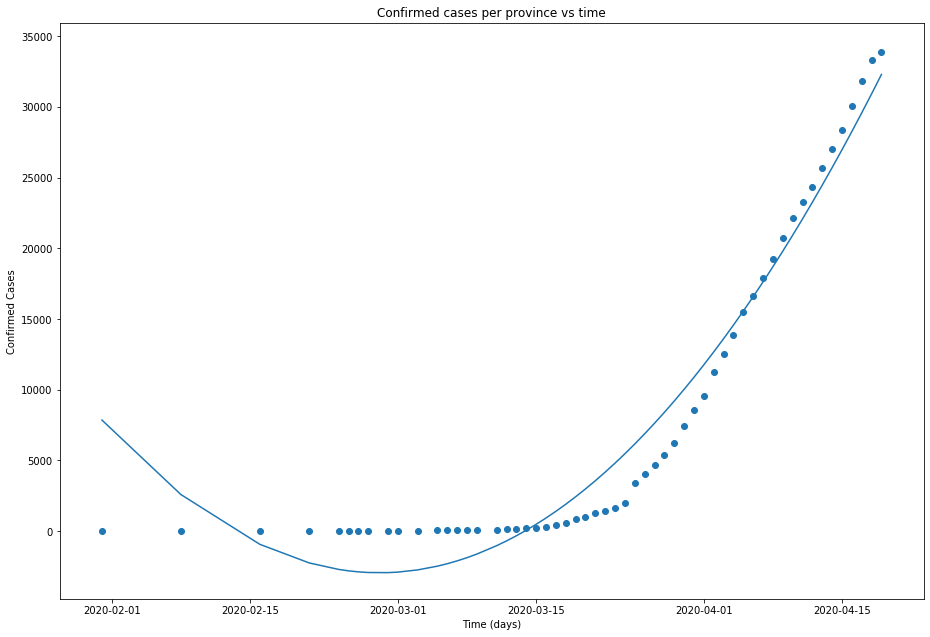

MSE predicted 5220196.005651002
R^2 =  0.955442143867452


In [30]:
X = X.ravel() # need to ravel X beacuse they are technically not 1D vectors this means that pilyfit is unable to use them
Y = Y.ravel()
f = np.polyfit(X,Y,2)
p = np.poly1d(f)

fig7=plt.figure()
ax7=fig7.add_axes([0,0,2,2])
ax7.plot(CN['Date'],p(X))
ax7.scatter(CN['Date'],CN['ConfirmedCases'])


ax7.set_xlabel('Time (days)')
ax7.set_ylabel('Confirmed Cases')
ax7.set_title('Confirmed cases per province vs time')
#ax4.legend()

plt.show()

MSE = mean_squared_error(CN['ConfirmedCases'],p(X))
R_2 = r2_score(Y,p(X)) 


print('MSE predicted',MSE)
print("R^2 = ",R_2)

#### model selection ####

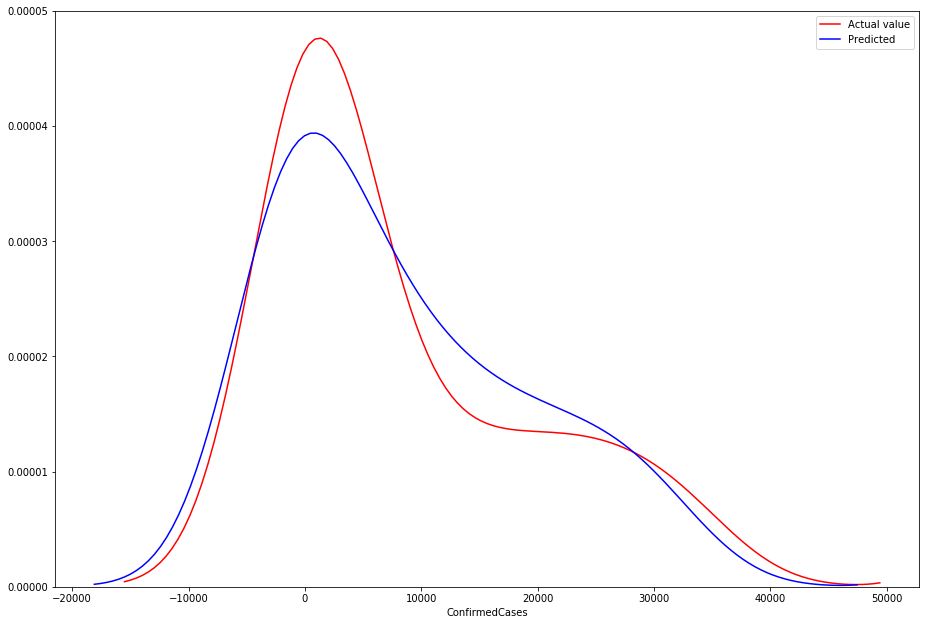

In [31]:
fig8=plt.figure()
ax8=fig8.add_axes([0,0,2,2])
ax8 = sns.distplot(CN['ConfirmedCases'],hist=False,color="r",label="Actual value")
sns.distplot(p(X),hist=False,color='b', label='Predicted', ax=ax8)


In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.45, random_state=0)


In [33]:
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train.reshape(-1,1))
x_test_pr = pr.fit_transform(x_test.reshape(-1,1))
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [34]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([20348.17475298,  9169.58296133, 15254.39270562,  4305.67252605,
       -2227.23555341])

In [36]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4])

Predicted values: [20348.17475298  9169.58296133 15254.39270562  4305.67252605]
True values: [20748  5386 13882  1302]


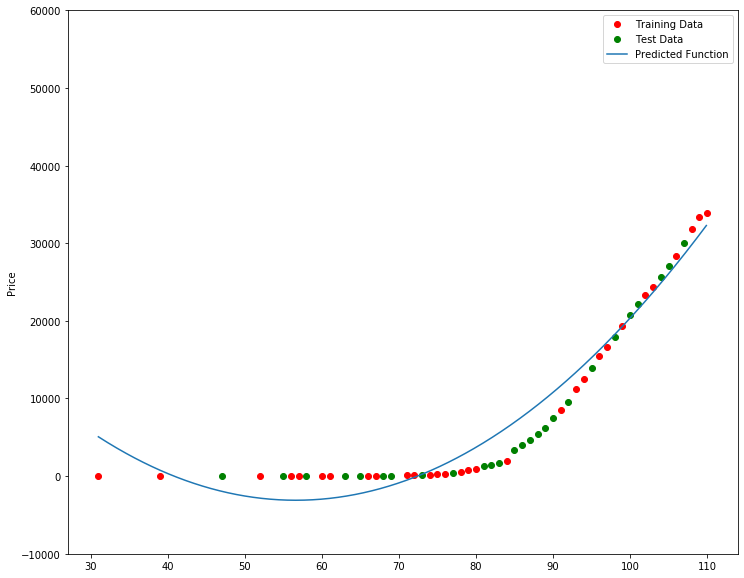

In [37]:
PollyPlot(x_train, x_test, y_train, y_test, poly,pr)

In [38]:
poly.score(x_train_pr, y_train)

0.9641006528124301

In [39]:
poly.score(x_test_pr, y_test)

0.9283620260104263

## Paper ##

I obtained thi

[2.74556285e-01 7.75673299e+00 2.13914651e-13]


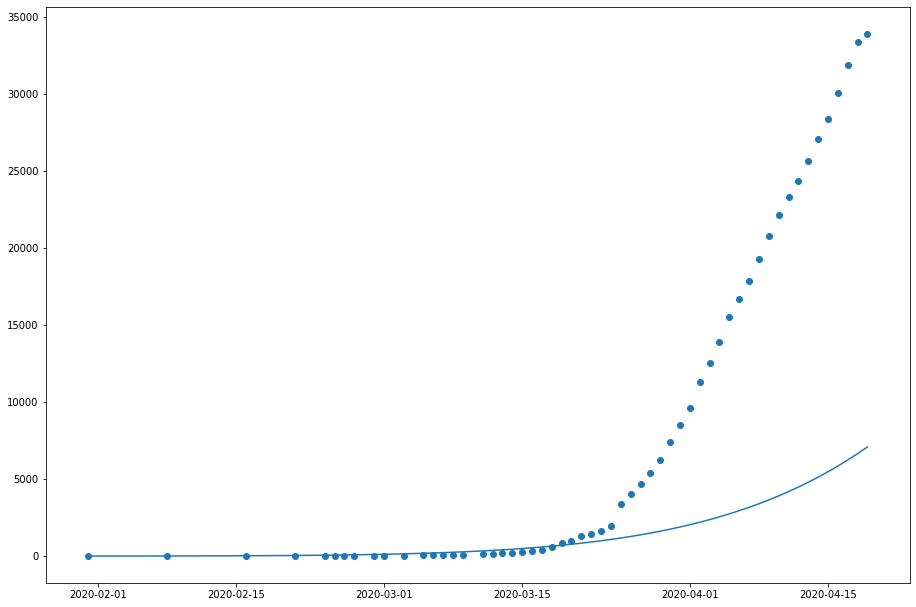

MSE predicted 122018750.32451804
R^2 =  -0.041511452165318374


In [51]:
from scipy.optimize import curve_fit

c0 = 0.2
r=0.5
p=0.9
m = 1/(1-p)
A = np.power(c0,2/m)

def c_t(t,r,m,A):
    return ((r/m)*t+A)**m

def c_d(c_t,r,p):
    return (r*c_t)**p


def func(x, a, b, c):
    return a*x + b
#ydata = np.polyfit(CN_days,CN['Confirmed-Cases'],)
popt, pcov = curve_fit(c_t, X,CN['ConfirmedCases'], bounds=(0,[r, m, A]))
print(popt)
ct = c_t(X,*popt)
#print(ct)
cd = c_d(ct,r,p)
#print(cd)

fig9=plt.figure()
ax9=fig9.add_axes([0,0,2,2])
ax9.plot(CN['Date'],cd)
ax9.scatter(CN['Date'],CN['ConfirmedCases'])

#print(ydata)
#fig9=plt.figure()
#ax9=fig9.add_axes([0,0,1,1])
#BC_Graph = ax9.scatter(, np.log(BC['Confirmed-Cases']), color='blue')
#ax1.plot(CN_days,np.log(ydata))

#ax9.plot(X['Date'],np.log(cd))
#ax1.plot(CN_days,c_t(CN_days,*popt))
plt.show()


MSE = mean_squared_error(CN['ConfirmedCases'],cd)
R_2 = r2_score(Y,cd) 


print('MSE predicted',MSE)
print("R^2 = ",R_2)




In [ ]:
fig9=plt.figure()
ax9=fig9.add_axes([0,0,2,2])
ax9 = sns.distplot(CN['Confirmed-Cases'],hist=False,color="r",label="Actual value")
sns.distplot(cd,hist=False,color='b', label='Predicted', ax=ax9)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.45, random_state=0)
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test.reshape(-1,1)))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test.reshape(-1,1))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [ ]:
pr = PolynomialFeatures(degree=2,include_bias=False)
x_polly=pr.fit_Transeform(df_